ALGORITMO GENÉTICO

In [ ]:
"""
---------PROBLEMA----------
Se rellenan los blancos con 0, se le (fila-columna/fila-columna/fila-columna...)

Solucion: debe tener todas 12 capas

R1. las capas C, F, J no pueden estar en los extremos

R2. la union G-K y la E-C son de utilidad -10

R3. La triple union F-L-G que deberia tener 54+18=72 es en realidad 88 y la union J-C-B que deberia tener 22+31=55 es en realidad de 25

--------CODIFICACIÓN--------

1a opción: (A,B,C,D,E,F,G,H,I,J,K,L) -numeros-> (0,1,2,3,4,5,6,7,8,9,10,11)
-ventajas: cruce sencillo
-desventajas: no se tienen tan en cuenta las parejas

2a opción: (A-B,B-C,C-D,D-E,E-F,F-G,G-H,H-I,I-J,J-K,K-L) -numeros-> (0-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,10-11)
-ventajas: se tienen tan en cuenta las parejas
-desventajas: cruce más complicado

--------FITNESS------------

sumar los valores de la tabla si se cumple un triple de R3 sumarlo y seguir con la tabla sin sumar ese triple de la tabla

-----------CRUCE------------
1a opción: cada letra para una posición se escoge con 50% del padre o la madre
2a opción: cada pareja se escoge con 50% del padre o d la madre, pero con 6 elementos luego rellenar los huecos de las parejas 

----------MUTACIÓN----------
1a opción: Variar con una probabilidad una letra
2a opción: Variar con una probabilidad una letra por tanto cambian 2 parejas

tras esto se comprueba si se ha incumplido R1
"""
import random
from heapq import nlargest
import math
import matplotlib.pyplot as plt
matrix = [
    [0, 10, 15, 25, 32, 25, 21, 21, 15, 22, 12, 54], 
    [41, 0, 57, 24, 52, 2, 66, 55, 61, 15, 6, 7],
    [21, 31, 0, 21, 21, 44, 21, 22, 22, 61, 47, 61],
    [66, 22, 15, 0, 47, 21, 41, 15, 21, 22, 32, 34],
    [21, 44, -10, 47, 0, 32, 26, 61, 55, 34, 18, 12],
    [22, 18, 22, 23, 41, 0, 21, 22, 44, 55, 54, 54],
    [15, 25, 34, 21, 26, 27, 0, 34, 25, 41, 7, 22],
    [61, 34, 12, 54, 21, 23, 15, 0, 21, 21, 55, 55],
    [22, 54, 54, 65, 3, 25, 61, 77, 0, 47, 22, 22],
    [34, 7, 22, 23, 54, 42, 22, 54, 21, 0, 12, 15],
    [26, 61, 55, 22, 18, 18, 22, 18, 34, 21, 0, 12],
    [22, 18, 25, 34, 21, 22, 18, 61, 55, 2, 22, 0]
]

In [ ]:
def f(I):
    if I[0] ==2 or I[0] ==5 or I[0] ==9 or I[size-1] ==2 or I[size-1] ==5 or I[size-1] ==9:
        return 0
    res = 0
    for i in range(0,size-1):
        if i < size-2 and I[i] == 5 and I[i+1] == 11 and I[i+2] == 6:
            res += 88
            i += 2
        elif i < size-2 and I[i] == 9 and I[i+1] == 2 and I[i+2] == 1:
            res += 25
            i += 2
        else:
            res += matrix[I[i]][I[i+1]]
    return res
def genPopulation(initP):
    aux = []
    for i in range(0,size):
      aux.append(random.randint(0,11))
    res = []
    for i in range(0,initP):
        res.append(random.sample(aux, size))
    return res

def selection(P, selectP):
    res=[]
    random.sample(P, len(P))
    for i in range(0,selectP):
        res.append(P[i])
    return res

def cross(S):
    sizeS = len(S)
    res = []
    for i in range(0,sizeS):
        if i < (sizeS - 1):
            res.append(crossI(S[i],S[i+1]))
    return res

def crossI(male, female):
    res=[]
    for i in range(0,size):
        x = random.uniform(0, 1)
        if x < 0.5:
            res.append(male[i])
        else:
            res.append(female[i])
    return res

def mutation(q, prob):
    aux = []
    for i in range(0,12):
      aux.append(i)
    size_q=len(q)
    for i in range(0,size_q):
        for j in range(0,size):
            x = random.uniform(0, 1)
            if x < prob:
                q[i][j] = aux[random.randint(0,11)]
    return q

def replace(P,S,Q,replacN):
    lista = P+S+Q
    leng_l = len(lista)
    res = []
    aux = nlargest(replacN, enumerate([f(element) for element in lista]), key=lambda x: x[1])
    repes=0
    for i in aux:
      res.append(lista[i[0]])
    return res

def converge(P, maximo):
    x = max([f(element) for element in P])
    return maximo < x
def convert(x):
  sample=[]
  for i in x:
    sample.append(x[i])
  for i in range(0,len(sample)):
    if sample[i]==0:
      sample[i] = 'A'
    elif sample[i]==1:
      sample[i] = 'B'
    elif sample[i]==2:
      sample[i] = 'C'
    elif sample[i]==3:
      sample[i] = 'D'
    elif sample[i]==4:
      sample[i] = 'E'
    elif sample[i]==5:
      sample[i] = 'F'
    elif sample[i]==6:
      sample[i] = 'G'
    elif sample[i]==7:
      sample[i] = 'H'
    elif sample[i]==8:
      sample[i] = 'I'
    elif sample[i]==9:
      sample[i] = 'J'
    elif sample[i]==10:
      sample[i] = 'K'
    else:
      sample[i] = 'L'
  return sample

In [ ]:
limit=1000         #Límite de generaciones
initP=200          #Población inicial
selectP=100        #Población a seleccionar para cruzar
probM=0.2          #Probabilidad de mutación sobre todos los alelos
replacN=200        #Población que sobrevive a la siguiente generación
maximo=9999999     #Valor a buscar como mejor solución
size = 12          #tamaño de la solución

In [ ]:
import time
begin = time.time()
t=0
end=False
P = genPopulation(initP)
aux = nlargest(len(P), enumerate([f(element) for element in P]), key=lambda x: x[1])
averange_t = [aux[int(replacN/2)][1]]
while not end:
    S = selection(P,selectP)
    q = cross(S)
    Q = mutation(q, probM)
    P = replace(P,S,Q,replacN)
    aux = nlargest(len(P), enumerate([f(element) for element in P]), key=lambda x: x[1])
    averange_t.append(aux[int(replacN/2)][1])
    t+=1
    if (t % 1000 == 0):
      print("*")
    end = converge(P, maximo) or (t > limit)
print("number of generations = ", t)
aux = nlargest(len(P), enumerate([f(element) for element in P]), key=lambda x: x[1])
res = []
for i in aux:
    res.append(i[1])
print("------ The duration is", time.time()-begin, "---------")
print("fitness values of the last population: ", res)
best = P[aux[res.index(max(res))][0]]
median = averange_t[len(averange_t)-1]
print("best single of the last population: ", convert(best), "with fitness value of ", max(res))
print("median value of the last population: ", median)

*
*
*
*
*
*
*
*
*
*
number of generations =  10001
------ The duration is 86.5899829864502 ---------
fitness values of the last population:  [692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692, 692

Text(0.5, 0, 'generations')

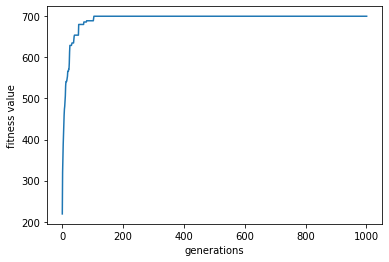

In [ ]:
plt.plot(averange_t)
plt.ylabel('fitness value')
plt.xlabel('generations')

ENFRIAMIENTO SIMULADO

In [ ]:
def generateNeig(Sa, nVecinos):
    res=[]
    #generacion de individuos aleatorios
    aux = []
    for i in range(0,size):
      aux.append(random.randint(0,11))
    for i in range(0, nVecinos):
      res.append(random.sample(aux, size))
    #generacion de vecinos a 1 cambio
    """x=0
    aux=[]
    pi=int(nVecinos/144)
    pd=int((nVecinos-pi*144)/12)
    pj=nVecinos-pi*144-pd*12
    print(pj)
    while x<pi:
      for j in range(0,12):
        for i in range(0,12):
          aux=Sa
          aux[j] = i
          res.append(aux)
      x+=1
    for j in range(0,pd):
      for i in range(0,12):
          aux=Sa
          aux[j] = i
          res.append(aux)
    for i in range(0,pj):
      aux=Sa
      aux[pd+1] = i
      res.append(aux)"""
    return res

def newBest(Sa, Sn, prob):
  x = random.uniform(0, 1)
  if x <= prob:
    return Sn
  else:
    return Sa

def alfa(T, k):
  return T/(1+k*T)
def alfa1(T, k):
  return k*T

In [ ]:
T = 1000          #Temperatura inicial
nVecinos=3000000     #Número de vecinos a generar
maximo = 800000   #Valor máximo a buscar
k = 0.002         #k para la función T=T/(1+k*T)
#k=0.85           #k para la función T=k*T
size = 12      #Tamaño de la solución

------ The duration is 0.2434096336364746 ---------
Solucion final: ['C', 'B', 'A', 'G', 'F', 'G', 'I', 'A', 'G', 'H', 'K', 'B']  con valor 544
10000
Mediana:  544


Text(0.5, 0, 'interations')

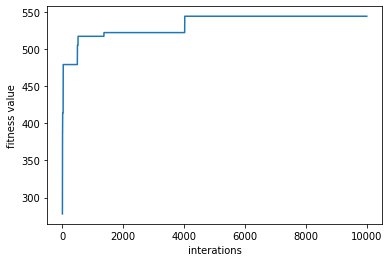

In [ ]:
import time
begin = time.time()
Sa = []
for i in range(0,size):
  Sa.append(random.randint(0,11))
#Sa=best
Sm = Sa
I = 0
fm = f(Sa)
neighbours = generateNeig(Sa, nVecinos)
mod_t=[]
t_val =[]
while I < nVecinos and fm < maximo:
  Sn = neighbours[I]
  I+=1
  fn = f(Sn)
  fa = f(Sa)
  deltaf = fn - fa
  mod_t.append(fm)
  if deltaf > 0:
    Sa = Sn
    if fn > f(Sm):
      Sm = Sn
      fm = fn
  else:
    if T!=0:
      Sa = newBest(Sa, Sn, math.exp(deltaf/T))
    T = alfa(T, k)
    #T = alfa1(T, k)
    t_val.append(T)
print("------ The duration is", time.time()-begin, "---------")
print("Solucion final:", convert(Sm), " con valor", fm)
print(len(mod_t))
print("Mediana: ", mod_t[len(mod_t)-1])
plt.plot(mod_t)
plt.ylabel('fitness value')
plt.xlabel('interations')

Text(0.5, 0, 'interations')

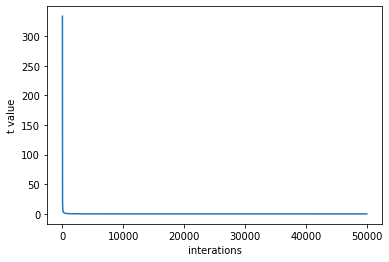

In [ ]:
plt.plot(t_val)
plt.ylabel('t value')
plt.xlabel('interations')

HARDCORE!!!

In [ ]:
size = 12
def f(I):
    if I[0] ==2 or I[0] ==5 or I[0] ==9 or I[size-1] ==2 or I[size-1] ==5 or I[size-1] ==9:
        return 0
    res = 0
    for i in range(0,size):
        if i < size-2 and I[i] == 5 and I[i+1] == 11 and I[i+2] == 6:
            res += 88
            i += 2
        elif i < size-2 and I[i] == 9 and I[i+1] == 2 and I[i+2] == 1:
            res += 25
            i += 2
        else:
            res += matrix[I[i]][I[i+1]]
    return res
def genPopulation(initP):
    aux = []
    for i in range(0,size):
      aux.append(i)
    res = []
    for i in range(0,initP):
        res.append(random.sample(aux, size))
    return res
def crossI(male, female):
    res=[]
    for i in range(0,size):
        x = random.uniform(0, 1)
        if x < 0.5:
            res.append(male[i])
        else:
            res.append(female[i])
    return res
def mutation(q, prob):
    aux = []
    for i in range(0,size):
      aux.append(i)
    size_q=len(q)
    for i in range(0,size_q):
        for j in range(0,size):
            x = random.uniform(0, 1)
            if x < prob:
                q[i][j] = aux[random.randint(0,11)]
    return q

In [ ]:
res=0
for i in matrix:
  aux = 0
  for j in i:
    aux+= j
  res+=aux/12
print(res/12)

28.305555555555557
